# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Import Datasets

In [3]:
train = pd.read_csv("F:\\Project Portfolio\\Churn Classification - Telecom Industry\\train.csv")
test = pd.read_csv("F:\\Project Portfolio\\Churn Classification - Telecom Industry\\test.csv")

# Exploratory Data Analysis

In [4]:
# view dimensions of dataset

train.shape

(5282, 21)

In [5]:
test.shape

(1761, 20)

In [6]:
# preview the dataset

train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [7]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5343-SGUBI,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Mailed check,80.20,4297.6
1,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5
2,6434-TTGJP,Male,0,Yes,Yes,10,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),53.70,521
3,1628-BIZYP,Male,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
4,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554


In [8]:
# View Summary of Datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [10]:
# Explore target (Churn) Variable
train['Churn'].value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

# Data Cleaning

In [11]:
# check missing values in variables

train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [13]:
# We need to convert 'TotalCharges' from object to float
train['TotalCharges'] = train['TotalCharges'].replace(' ',np.nan)
test['TotalCharges'] = test['TotalCharges'].replace(' ',np.nan)

train['TotalCharges'] = train['TotalCharges'].astype('float64')
test['TotalCharges'] = test['TotalCharges'].astype('float64')

In [14]:
train['TotalCharges'].fillna(train['TotalCharges'].mean(),inplace=True)

In [15]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
test['TotalCharges'].mean()

2246.520733788396

In [17]:
test['TotalCharges'].fillna(test['TotalCharges'].mean(),inplace=True)

In [18]:
test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [19]:
#Checking Correlation between TotalCharges and MonthlyCharges ,both are highly correlated ,dropped MonthlyCharges
correlation = train['MonthlyCharges'].corr(train['TotalCharges'])
correlation

0.654112853832767

In [20]:
correlation = test['MonthlyCharges'].corr(test['TotalCharges'])
correlation

0.6391150708110397

# Partition Data into X and Y

In [21]:
# Train dataset
y = train['Churn']
X = train.drop(['Churn','customerID','MonthlyCharges'], axis = 1)

# Create Dummy Variables

In [22]:
# Improvement Area 1 - OHE, Ord Enc, Categorical Encoders
X = pd.get_dummies(X)
X.head(5)

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,3784.00,1,0,0,1,0,1,1,...,1,0,0,1,1,0,0,1,0,0
1,0,4,193.60,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,56,1238.65,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,56,5124.60,0,1,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,9,723.40,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [23]:
# Test dataset
X_predict = test.drop(['customerID','MonthlyCharges'], axis = 1)

In [24]:
X_predict = pd.get_dummies(X_predict)
X_predict.head(5)

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,52,4297.6,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,33,838.5,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,10,521.0,0,1,0,1,0,1,1,...,1,0,0,1,1,0,0,1,0,0
3,0,1,85.0,0,1,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,52,2554.0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5282 non-null   int64  
 1   tenure                                   5282 non-null   int64  
 2   TotalCharges                             5282 non-null   float64
 3   gender_Female                            5282 non-null   uint8  
 4   gender_Male                              5282 non-null   uint8  
 5   Partner_No                               5282 non-null   uint8  
 6   Partner_Yes                              5282 non-null   uint8  
 7   Dependents_No                            5282 non-null   uint8  
 8   Dependents_Yes                           5282 non-null   uint8  
 9   PhoneService_No                          5282 non-null   uint8  
 10  PhoneService_Yes                         5282 no

In [26]:
train['TotalCharges'].value_counts()

20.200000      9
2295.560343    8
19.650000      7
19.900000      6
19.750000      6
              ..
4519.500000    1
3886.050000    1
2727.800000    1
1888.450000    1
109.300000     1
Name: TotalCharges, Length: 4959, dtype: int64

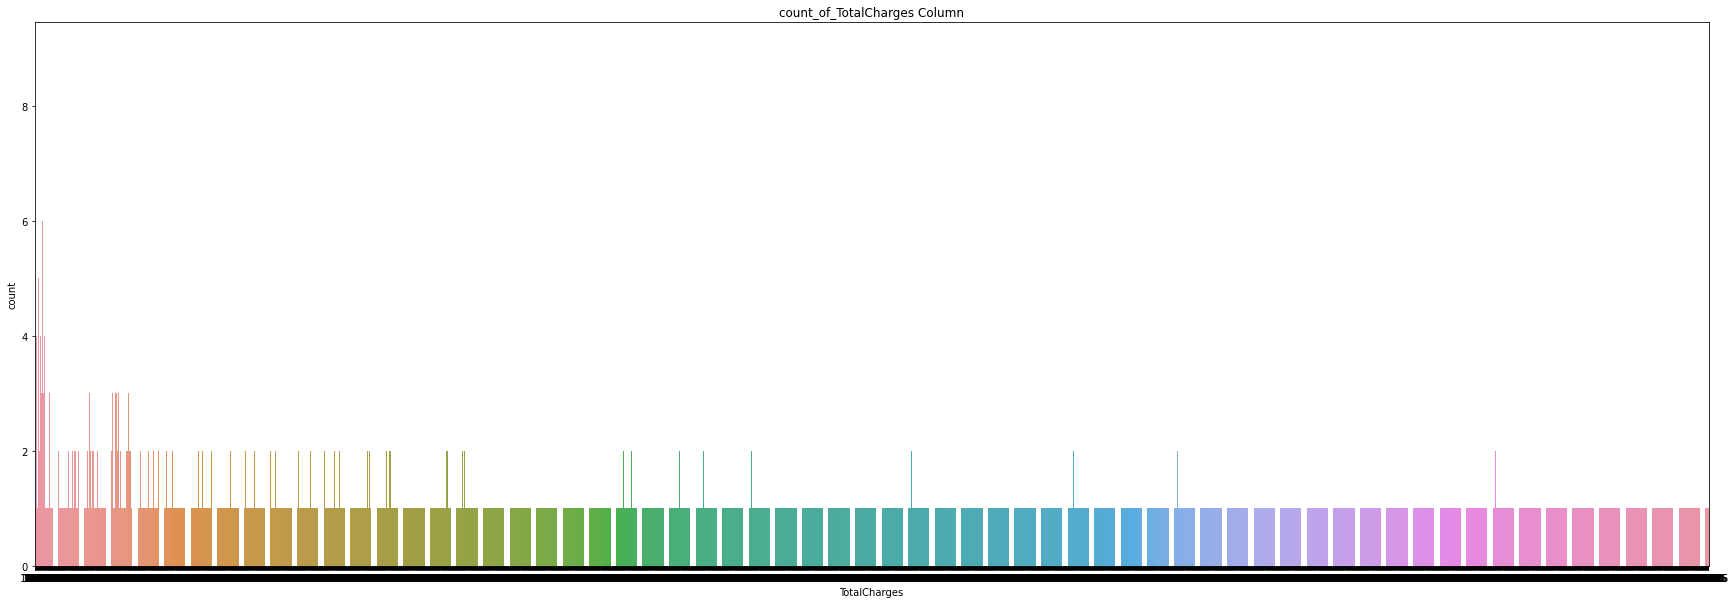

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize= (30,10))
sns.countplot(x='TotalCharges',data=train)
plt.title('count_of_TotalCharges Column')
plt.show()

In [28]:
train['SeniorCitizen'].value_counts()

0    4426
1     856
Name: SeniorCitizen, dtype: int64

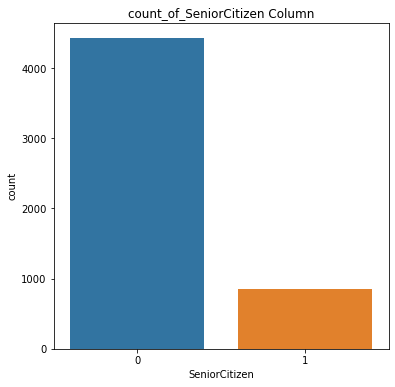

In [29]:
plt.figure(figsize= (6,6))
sns.countplot(x='SeniorCitizen',data=train)
plt.title('count_of_SeniorCitizen Column')
plt.show()

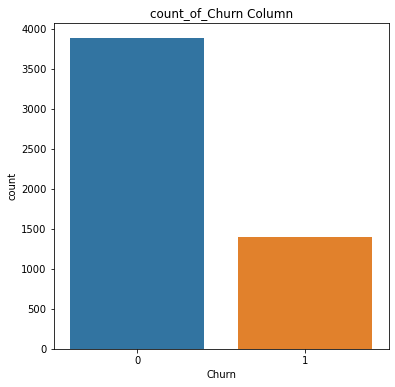

In [30]:
plt.figure(figsize= (6,6))
sns.countplot(x='Churn',data=train)
plt.title('count_of_Churn Column')
plt.show()

# Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify = y)

In [32]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4225, 44), (1057, 44))

# Random Forest Classifier model with default parametes

In [33]:
# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10,random_state=0)

In [34]:
# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [35]:
# Predict the Test set results

y_pred = rfc.predict(X_test)
#X_pred = rfc.predict(X_train)


In [36]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7833


# Random Forest Classifier model with parameter n_estimators = 100

In [37]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0,class_weight='balanced')

In [38]:
# fit the model to the training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [39]:
# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [40]:
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7890


In [41]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [42]:
# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TotalCharges                               0.197015
tenure                                     0.157893
Contract_Month-to-month                    0.054085
TechSupport_No                             0.037256
OnlineSecurity_No                          0.030531
PaymentMethod_Electronic check             0.028600
InternetService_Fiber optic                0.025935
OnlineBackup_No                            0.023302
SeniorCitizen                              0.022896
gender_Male                                0.020442
gender_Female                              0.020370
PaperlessBilling_No                        0.018130
PaperlessBilling_Yes                       0.017159
Partner_No                                 0.017005
Partner_Yes                                0.016884
InternetService_DSL                        0.016803
MultipleLines_Yes                          0.016633
MultipleLines_No                           0.016173
DeviceProtection_No                        0.016041
Contract_Two

In [44]:
#We can see that the most important feature is 'Tenure' and least important feature is 'TechSupport_No internet service' 

In [45]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

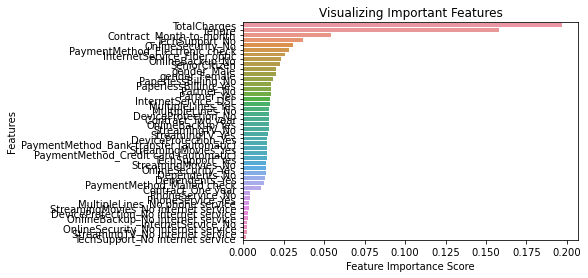

In [46]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

# Confusion matrix

In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[693  83]
 [146 135]]


In [48]:
#Improvement Area 
dt_param_grid = {
    'n_estimators' : (60,80,100,120,140,160,180),
    'max_depth' : (3,5,7,9),
    'max_features' :  ['auto', 'sqrt', 'log2'] }

In [49]:
rf_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1,oob_score=False),param_grid = dt_param_grid, cv = 3,verbose = True)

In [50]:
rf__grid_model = rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [51]:
rf__grid_model.best_estimator_

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=160,
                       n_jobs=-1)

In [52]:
rf_score = rf__grid_model.best_score_
rf_score

0.8061544965266575

In [53]:
rf_model=RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=160,
                       n_jobs=-1)

In [54]:
y_train_predicted = rf_grid.predict(X_train)
y_test_predicted = rf_grid.predict(X_test)

In [55]:
#y_sub_predicted = rf_grid.predict(X_predict)

In [56]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3104
           1       0.73      0.54      0.62      1121

    accuracy                           0.83      4225
   macro avg       0.79      0.73      0.75      4225
weighted avg       0.82      0.83      0.82      4225



In [57]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       776
           1       0.66      0.51      0.58       281

    accuracy                           0.80      1057
   macro avg       0.75      0.71      0.72      1057
weighted avg       0.79      0.80      0.79      1057



In [123]:
#y_sub_predicted = rf_grid.predict(X_predict)
#y_sub_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Bagged Tree 

In [59]:
bt= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [60]:
bt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=400)

In [61]:
bt.oob_score_

0.7652071005917159

In [62]:
bt_score = bt.score(X_test,y_test)
bt_score

0.7814569536423841

In [63]:
for w in range(10,300,20):
    bt= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,base_estimator=DecisionTreeClassifier())
    bt.fit(X_train,y_train)
    oob=bt.oob_score_
    print('For n_estimatiors = '+str(w))
    print('OOB score is '+str(oob))
    print("*************************")

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


For n_estimatiors = 10
OOB score is 0.7500591715976331
*************************
For n_estimatiors = 30
OOB score is 0.7635502958579882
*************************
For n_estimatiors = 50
OOB score is 0.77301775147929
*************************
For n_estimatiors = 70
OOB score is 0.7779881656804734
*************************
For n_estimatiors = 90
OOB score is 0.7768047337278107
*************************
For n_estimatiors = 110
OOB score is 0.778698224852071
*************************
For n_estimatiors = 130
OOB score is 0.781301775147929
*************************
For n_estimatiors = 150
OOB score is 0.7794082840236687
*************************
For n_estimatiors = 170
OOB score is 0.7791715976331361
*************************
For n_estimatiors = 190
OOB score is 0.7810650887573964
*************************
For n_estimatiors = 210
OOB score is 0.7808284023668639
*************************
For n_estimatiors = 230
OOB score is 0.7794082840236687
*************************
For n_estimatiors = 250
O

In [64]:
#Finalizing on a tree model with 130 trees
bt= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=130,random_state=400,base_estimator=DecisionTreeClassifier())
bt.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=130,
                  n_jobs=-1, oob_score=True, random_state=400)

In [65]:
#Feature Importance
bt.estimators_

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [66]:
bt.estimators_[0]

DecisionTreeClassifier(random_state=1859118377)

In [67]:
bt.estimators_[0].feature_importances_

array([0.02174449, 0.13823801, 0.26538887, 0.01267062, 0.01444093,
       0.01374833, 0.00872071, 0.00891174, 0.00919263, 0.00087013,
       0.00121082, 0.01469645, 0.0047926 , 0.01405296, 0.        ,
       0.0609299 , 0.        , 0.03088423, 0.00123705, 0.00915221,
       0.01380777, 0.0008247 , 0.01209381, 0.0101485 , 0.        ,
       0.00624601, 0.00968621, 0.        , 0.02097902, 0.01115688,
       0.        , 0.00841539, 0.01359824, 0.        , 0.01730636,
       0.14495758, 0.00455846, 0.00079574, 0.00786327, 0.01710496,
       0.01528424, 0.02143531, 0.01505522, 0.01779963])

In [68]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in bt.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [69]:
feature_importance2=pd.Series(imp,index=X.columns.tolist())

In [70]:
feature_importance2.sort_values(ascending= False)

TotalCharges                               0.264855
Contract_Month-to-month                    0.164315
tenure                                     0.145231
InternetService_Fiber optic                0.048268
SeniorCitizen                              0.021603
OnlineSecurity_No                          0.021332
PaymentMethod_Electronic check             0.019720
TechSupport_No                             0.018578
gender_Female                              0.015740
gender_Male                                0.015536
PaymentMethod_Credit card (automatic)      0.015196
PaperlessBilling_No                        0.014915
PaperlessBilling_Yes                       0.013912
PaymentMethod_Mailed check                 0.013110
PaymentMethod_Bank transfer (automatic)    0.012683
Partner_No                                 0.012551
Partner_Yes                                0.012526
MultipleLines_No                           0.012485
OnlineBackup_No                            0.012312
OnlineBackup

<AxesSubplot:>

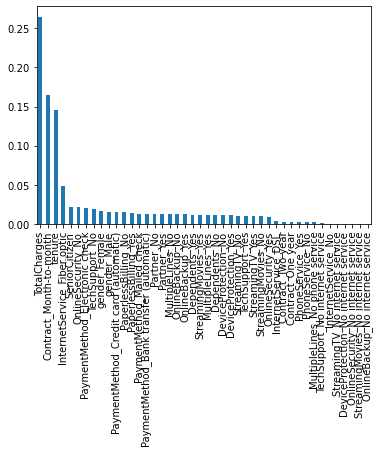

In [71]:
feature_importance2.sort_values(ascending= False).plot(kind='bar')

In [72]:
y_train_predicted1 = bt.predict(X_train)
y_test_predicted1 = bt.predict(X_test)

In [73]:
print(classification_report(y_train, y_train_predicted1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [74]:
print(classification_report(y_test, y_test_predicted1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       776
           1       0.62      0.51      0.56       281

    accuracy                           0.79      1057
   macro avg       0.73      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057



# XG Boost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [76]:
clf_xgb= xgb.XGBClassifier(objective='binary:logistic', seed=42, booster= 'gbtree')

In [77]:
## Hyper Parameter Optimization

params={
  "subsample"            : [ 0.4,0.5, 0.6,0.7,0.8,0.9,1.0 ],
 "min_child_weight" : [  5,6,7,8,9,10,11,12 ],
    "max_depth"        : [ 1,2,3, 4, 5, 6, 8, 10,],
 "learning_rate"    : [ 0.01,0.03,0.05,0.10,0.15, 0.20 ] ,
 "gamma"            : [0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9 ],
"eta"            : [ 0.1,0.2 , 0.3, 0.4, 0.5, 0.6,0.7,0.8 ],
 "colsample_bytree" : [ 0.13,0.15,0.17,0.19,0.21,0.23,0.24,0.25,0.26 ]   
}

In [78]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(clf_xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [79]:
random_search= random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [80]:
random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 8,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'eta': 0.5,
 'colsample_bytree': 0.21}

In [81]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.21, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [82]:
xgb=xgb.XGBClassifier(min_child_weight=8,max_depth= 2,learning_rate= 0.15,gamma= 0.5,colsample_bytree= 0.19, eta=0.5, subsample= 1.0, booster='gbtree',random_state=42)

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb,X_test,y_test,cv=10)
score

array([0.79245283, 0.79245283, 0.82075472, 0.78301887, 0.83962264,
       0.83018868, 0.82075472, 0.77142857, 0.79047619, 0.84761905])

In [84]:
xgboost_score = score.mean()
xgboost_score

0.8088769092542678

In [85]:
xgb.fit(X_train,y_train, verbose= True, eval_metric="aucpr",early_stopping_rounds=10,eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.49685
[1]	validation_0-aucpr:0.52285
[2]	validation_0-aucpr:0.57172
[3]	validation_0-aucpr:0.57168
[4]	validation_0-aucpr:0.58879
[5]	validation_0-aucpr:0.58924
[6]	validation_0-aucpr:0.60628
[7]	validation_0-aucpr:0.61176
[8]	validation_0-aucpr:0.62617


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-aucpr:0.63043
[10]	validation_0-aucpr:0.63894
[11]	validation_0-aucpr:0.64835
[12]	validation_0-aucpr:0.64995
[13]	validation_0-aucpr:0.64896
[14]	validation_0-aucpr:0.64833
[15]	validation_0-aucpr:0.64744
[16]	validation_0-aucpr:0.64654
[17]	validation_0-aucpr:0.64783
[18]	validation_0-aucpr:0.64921
[19]	validation_0-aucpr:0.64910
[20]	validation_0-aucpr:0.64866
[21]	validation_0-aucpr:0.64897
[22]	validation_0-aucpr:0.65113
[23]	validation_0-aucpr:0.65072
[24]	validation_0-aucpr:0.65180
[25]	validation_0-aucpr:0.65258
[26]	validation_0-aucpr:0.65515
[27]	validation_0-aucpr:0.65941
[28]	validation_0-aucpr:0.66048
[29]	validation_0-aucpr:0.66273
[30]	validation_0-aucpr:0.66640
[31]	validation_0-aucpr:0.66547
[32]	validation_0-aucpr:0.66541
[33]	validation_0-aucpr:0.66742
[34]	validation_0-aucpr:0.66810
[35]	validation_0-aucpr:0.66826
[36]	validation_0-aucpr:0.67150
[37]	validation_0-aucpr:0.67300
[38]	validation_0-aucpr:0.67521
[39]	validation_0-aucpr:0.67722
[40]	vali

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.19, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [86]:
xgb.feature_importances_

array([0.00447633, 0.02530356, 0.02144946, 0.00358626, 0.00385345,
       0.01042398, 0.00647386, 0.01702471, 0.00548041, 0.00229302,
       0.        , 0.00398962, 0.        , 0.00395514, 0.0253021 ,
       0.04144935, 0.04106131, 0.23235235, 0.03163127, 0.00368491,
       0.06478876, 0.04333514, 0.01284537, 0.        , 0.00361208,
       0.00143589, 0.07395475, 0.        , 0.02286033, 0.00363533,
       0.        , 0.00510194, 0.00336035, 0.        , 0.00557672,
       0.06820352, 0.02017486, 0.04922627, 0.03012194, 0.00296665,
       0.00357183, 0.00166296, 0.09843595, 0.00133823], dtype=float32)

In [87]:
feature_imp3= pd.Series(xgb.feature_importances_,index=X.columns)
feature_imp3.sort_values(ascending= False)

OnlineSecurity_No                          0.232352
PaymentMethod_Electronic check             0.098436
TechSupport_No                             0.073955
Contract_Month-to-month                    0.068204
OnlineBackup_No                            0.064789
Contract_Two year                          0.049226
OnlineBackup_No internet service           0.043335
InternetService_Fiber optic                0.041449
InternetService_No                         0.041061
OnlineSecurity_No internet service         0.031631
PaperlessBilling_No                        0.030122
tenure                                     0.025304
InternetService_DSL                        0.025302
TechSupport_Yes                            0.022860
TotalCharges                               0.021449
Contract_One year                          0.020175
Dependents_No                              0.017025
OnlineBackup_Yes                           0.012845
Partner_No                                 0.010424
Partner_Yes 

<AxesSubplot:>

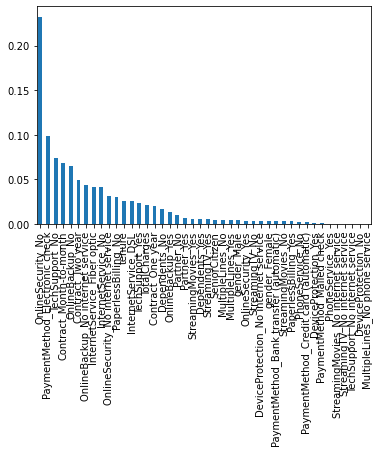

In [88]:
feature_imp3.sort_values(ascending= False).plot(kind='bar')

In [89]:
y_train_predicted2 = xgb.predict(X_train)
y_test_predicted2 = xgb.predict(X_test)

In [90]:
print(classification_report(y_train, y_train_predicted2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3104
           1       0.69      0.53      0.60      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.72      0.74      4225
weighted avg       0.80      0.81      0.80      4225



In [91]:
print(classification_report(y_test, y_test_predicted2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       776
           1       0.68      0.55      0.61       281

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057



# Decision Tree

In [92]:
#dt= DecisionTreeClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())
dt = DecisionTreeClassifier(random_state = 42)

In [93]:
dt.fit(X_train, y_train)
dt.max_features_

44

In [95]:
dt.score(X_train, y_train)

0.9983431952662722

In [105]:
# Create Parameter grid
dt_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,4,5,6,7,8,9,10]
}

In [106]:
#Initiate GridSearch CV
gs_dt = GridSearchCV(dt, param_grid = dt_param_grid, scoring = 'accuracy')

In [107]:
gs_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [109]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=42)

In [110]:
best_dt_estimates = gs_dt.best_estimator_

In [111]:
best_dt_estimates.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [112]:
y_train_predicted3 = best_dt_estimates.predict(X_train)
y_test_predicted3 = best_dt_estimates.predict(X_test)

In [113]:
print('Accuracy score decision-trees max_depth=4 : {0:0.4f}'. format(accuracy_score(y_test, y_test_predicted3)))

Accuracy score decision-trees max_depth=4 : 0.7871


In [267]:
print(classification_report(y_train, y_train_predicted3))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3104
           1       0.67      0.47      0.55      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.69      0.71      4225
weighted avg       0.79      0.80      0.79      4225



In [268]:
print(classification_report(y_test, y_test_predicted3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       776
           1       0.63      0.49      0.55       281

    accuracy                           0.79      1057
   macro avg       0.73      0.69      0.70      1057
weighted avg       0.78      0.79      0.78      1057



In [124]:
#Post Pruning 

#Find ccp_alphas path
ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 3.94477318e-05, 4.73372781e-05, 6.31163708e-05,
       7.10059172e-05, 7.88954635e-05, 7.88954635e-05, 7.88954635e-05,
       7.88954635e-05, 7.88954635e-05, 1.09239873e-04, 1.16652578e-04,
       1.36175732e-04, 1.38067061e-04, 1.40258602e-04, 1.42011834e-04,
       1.43446297e-04, 1.43446297e-04, 1.48509108e-04, 1.51479290e-04,
       1.53407846e-04, 1.53407846e-04, 1.53745006e-04, 1.54433673e-04,
       1.56878841e-04, 1.57790927e-04, 1.57790927e-04, 1.57790927e-04,
       1.57790927e-04, 1.57790927e-04, 1.57790927e-04, 1.57790927e-04,
       1.57790927e-04, 1.57790927e-04, 1.57790927e-04, 1.71315864e-04,
       1.71597633e-04, 1.73260626e-04, 1.77514793e-04, 1.77514793e-04,
       1.77514793e-04, 1.77514793e-04, 1.77514793e-04, 1.77514793e-04,
       1.77514793e-04, 1.77514793e-04, 1.77514793e-04, 1.77514793e-04,
       1.78829717e-04, 1.80332488e-04, 1.83522986e-04, 1.84089415e-04,
       1.85804534e-04, 1.88472496e-04, 1.89072407e-04, 1.89349112e-04,
      

In [125]:
# Keep all Params Same and only change cc_alpha
dt_param_grid = {
    'ccp_alpha'  : ccp_alphas
}

In [126]:
# Re Do Grid Search to get best cc_alpha
gs_cc_dt = GridSearchCV(dt, param_grid = dt_param_grid, scoring = 'accuracy')

In [127]:
gs_cc_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.94477318e-05, 4.73372781e-05, 6.31163708e-05,
       7.10059172e-05, 7.88954635e-05, 7.88954635e-05, 7.88954635e-05,
       7.88954635e-05, 7.88954635e-05, 1.09239873e-04, 1.16652578e-04,
       1.36175732e-04, 1.38067061e-04, 1.40258602e-04, 1.42011834e-04,
       1.43446297e-04, 1...
       6.83108126e-04, 6.84180125e-04, 6.84468697e-04, 6.86755301e-04,
       7.10288426e-04, 7.28296168e-04, 7.47718180e-04, 8.02382424e-04,
       8.23273444e-04, 9.27788940e-04, 9.35948534e-04, 9.75286444e-04,
       9.75729158e-04, 1.04123758e-03, 1.51430492e-03, 1.82449535e-03,
       2.03412071e-03, 2.04399427e-03, 4.34684535e-03, 6.03709839e-03,
       1.32893933e-02, 1.94744529e-02, 6.37851973e-02])},
             scoring='accuracy')

In [128]:
best_dt_cc = gs_cc_dt.best_estimator_
gs_cc_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001041237577421493, random_state=42)

In [129]:
dt_p_score = best_dt_cc.score(X_test, y_test)

In [130]:
y_train_predicted4 = best_dt_cc.predict(X_train)
y_test_predicted4 = best_dt_cc.predict(X_test)

In [131]:
print('Accuracy score decision-trees post pruning max_depth=4 : {0:0.4f}'. format(accuracy_score(y_test, y_test_predicted4)))

Accuracy score decision-trees post pruning max_depth=4 : 0.7938


In [132]:
print(classification_report(y_train, y_train_predicted4))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3104
           1       0.62      0.63      0.62      1121

    accuracy                           0.80      4225
   macro avg       0.74      0.74      0.74      4225
weighted avg       0.80      0.80      0.80      4225



In [133]:
print(classification_report(y_test, y_test_predicted4))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       776
           1       0.61      0.64      0.62       281

    accuracy                           0.79      1057
   macro avg       0.74      0.75      0.74      1057
weighted avg       0.80      0.79      0.80      1057



In [134]:
print('Random forest accuracy :',rf_score)
print('Bagging Tree accuracy:',bt_score)
print('Xgboost accuracy :',xgboost_score)
print('Decision Tree accuracy: ',dt_p_score)

Random forest accuracy : 0.8061544965266575
Bagging Tree accuracy: 0.7814569536423841
Xgboost accuracy : 0.8088769092542678
Decision Tree accuracy:  0.793755912961211


Xgboost is the best model for customer Churn with the accuracy of 0.8088

In [207]:
# submission4 = pd.DataFrame({
#     'customerID' : test['customerID'],
#     'Churn' : y_sub_predicted
# })
# submission4.head()


In [208]:
# Export Submission file
#submission4.to_csv('submission4.csv', index = False)